Simple Linear Regression


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Read dataset
df=pd.read_csv('weight_height.csv')
df.head()

,Weight,Height
0,60,160
1,61,161
2,62,160
3,65,163
4,64,162


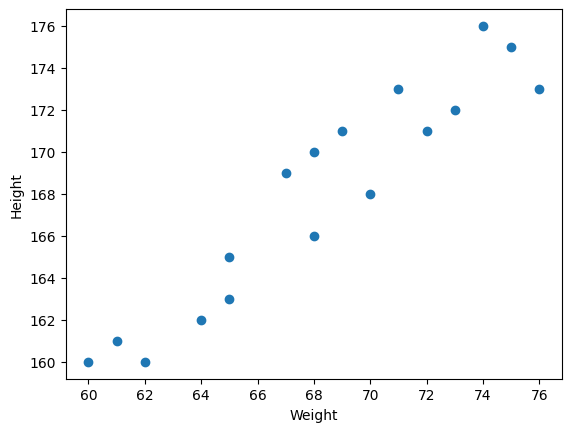

In [57]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [58]:
#divide data into dependent and independent features
X=df[['Weight']]
y=df['Height']

In [59]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [60]:
X.shape

(17, 1)

In [61]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13, 1), (4, 1), (13,), (4,))

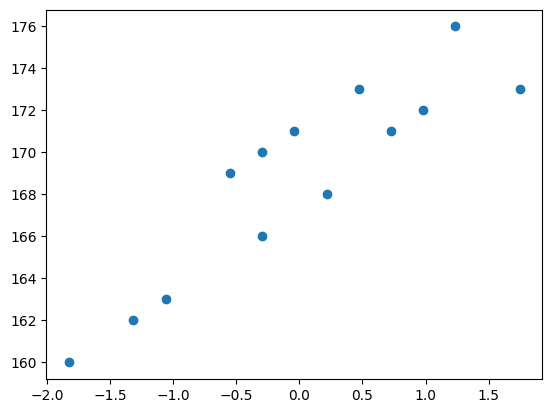

In [62]:
#standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
plt.scatter(X_train,y_train)


In [63]:
#Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [64]:
print("The Slope coefficient of weight is",linreg.coef_)
print("Intercept:",linreg.intercept_)

The Slope coefficient of weight is [4.16992245]
Intercept: 168.76923076923077


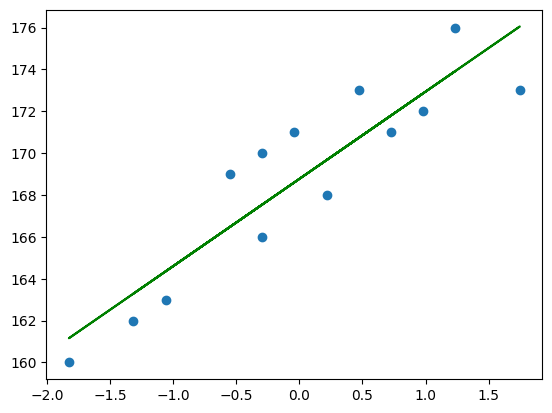

In [65]:
plt.scatter(X_train,y_train)
plt.plot(X_train,linreg.predict(X_train),'g')
plt.show()      

In [66]:
y_pred_test=linreg.predict(X_test)
y_pred_test

array([159.03004622, 160.09399076, 164.34976888, 174.98921418])

In [67]:
y_test

0     160
1     161
5     165
15    175
Name: Height, dtype: int64

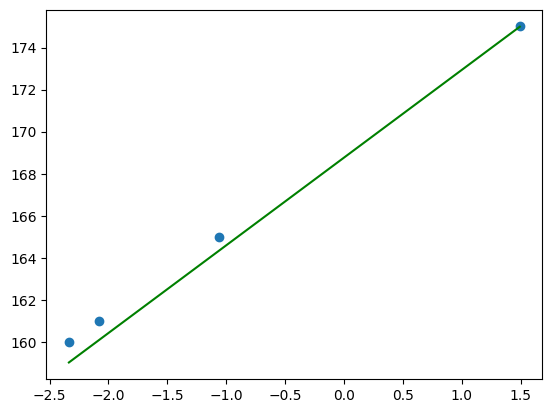

In [68]:
plt.scatter(X_test,y_test)
plt.plot(X_test,linreg.predict(X_test),'g')

In [69]:
#Performance Metric 
#MSE,MAE and RMSE
#R Square and Adjuster R square
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)

MSE: 0.5461449818495291
MAE: 0.6342449922958409
RMSE: 0.7390162257011202


In [70]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.9844790058444184


In [71]:
#Adjusted R Square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9767185087666276

In [72]:
#new data point weight is 78
scaled_weight=scaler.transform([[80]])
scaled_weight

c:\Users\ANURAG PATKAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[2.76736707]])

In [74]:
print("The height prediction for 80kg weight is", linreg.predict([scaled_weight[0]]))

The height prediction for 80kg weight is [180.30893683]


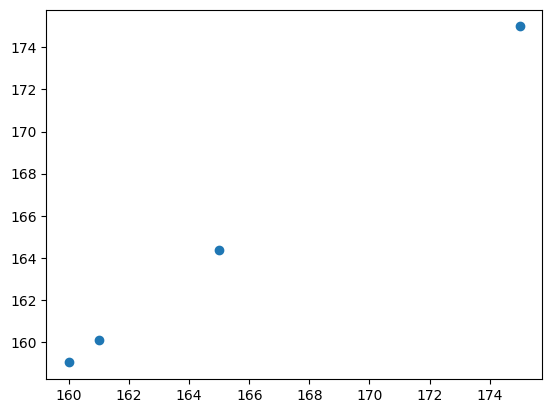

In [75]:
##Assumptions
##plot a scatter plot for prediction
plt.scatter(y_test,y_pred_test)

In [76]:
##Residual
residual=y_test-y_pred_test
residual

0     0.969954
1     0.906009
5     0.650231
15    0.010786
Name: Height, dtype: float64

C:\Users\ANURAG PATKAR\AppData\Local\Temp\ipykernel_12792\374906370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

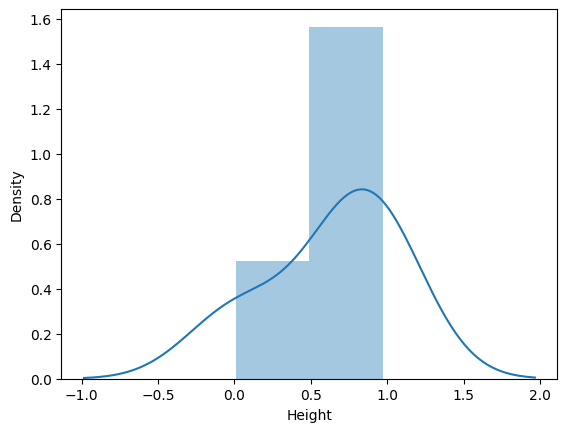

In [79]:
#plot these residual
import seaborn as sns
sns.distplot(residual,kde=True)

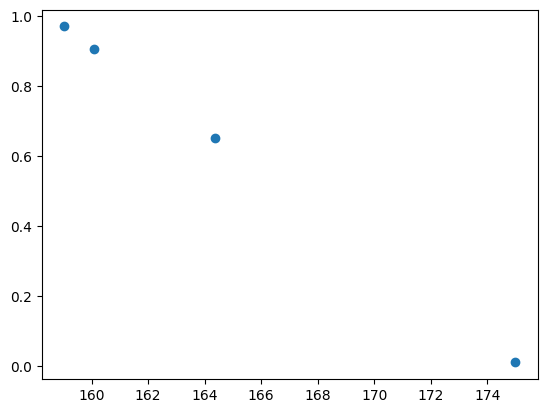

In [80]:
#Scatter plot with respect to prediction and residuals
##Unifrom Distribution
plt.scatter(y_pred_test,residual)